In [1]:
import pandas as pd
import numpy as np
import os
print os.getcwd();

C:\Users\henrique\Desktop\Polytechnique\3rd year\Projet 3A


In [2]:
# import libraries for visualization
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# import libraries for meanshift clustering
from sklearn.cluster import MeanShift, estimate_bandwidth

## Reading csv file

In [4]:
df = pd.read_csv('nba-2015-2016-regular-season.csv')

## Building new dataframe with only numerical features

In [5]:
df2 = df.select_dtypes(include=['number'])

In [9]:
df2

,AGE,GP,W,L,MIN,FGM,FGA,FG%,03:00:00 PM,3PA,...,REB,AST,TOV,STL,BLK,PF,DD2,TD3,PTS,+/-
0,31,69,36,33,16.1,2.7,6.8,40.1,1.0,2.7,...,1.5,2.6,1.2,0.4,0.1,1.9,0,0,7.1,-0.1
1,20,78,32,46,23.9,3.5,7.4,47.3,0.5,1.8,...,6.5,1.6,0.8,0.8,0.7,2.0,12,0,9.2,-1.0
2,21,21,15,6,4.4,0.2,0.9,26.3,0.1,0.5,...,0.7,0.1,0.2,0.3,0.0,0.5,0,0,0.9,-0.3
3,25,52,18,34,9.3,1.0,2.8,36.6,0.2,0.6,...,2.1,0.6,0.7,0.3,0.2,1.5,0,0,2.5,-2.3
4,30,82,48,34,32.1,6.5,12.8,50.5,1.1,3.1,...,7.3,3.2,1.3,0.8,1.5,2.0,17,0,15.2,2.8
5,31,47,33,14,23.3,5.2,10.7,48.5,0.0,0.0,...,6.4,1.5,0.7,0.6,0.9,2.5,7,0,12.0,1.0
6,25,82,44,38,28.5,3.6,8.8,41.6,1.5,4.3,...,6.1,1.7,1.5,0.9,0.6,2.1,8,0,10.2,0.7
7,33,13,8,5,14.8,1.6,4.5,35.6,0.9,2.8,...,2.1,1.1,0.2,0.3,0.1,1.9,0,0,5.0,2.3
8,23,10,3,7,6.8,1.0,2.4,41.7,0.0,0.0,...,3.8,0.5,0.6,0.4,0.5,1.5,1,0,2.9,0.1
9,24,31,13,18,25.7,4.4,10.8,41.0,1.0,2.5,...,3.5,2.0,1.6,0.6,0.1,2.3,0,0,13.3,-0.4


In [50]:
bandwidth = estimate_bandwidth(np.array(df2.values.tolist()), quantile=0.1)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(df2)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 9


## Applying PCA

In [51]:
#import libraries for features decomposition
from sklearn import decomposition

In [52]:
pca = decomposition.PCA(n_components=3)
pca.fit(df2)
reduced_df = pca.transform(df2)
pca.explained_variance_ratio_

array([ 0.51189229,  0.1445161 ,  0.11566013])

## Ploting reduced dataset with mean shift labels

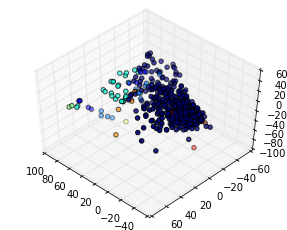

In [53]:
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(reduced_df[:, 0], reduced_df[:, 1], reduced_df[:, 2], c=labels)